In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from astrotime.encoders.wotan.flatten import flatten

points = 1000
time = np.linspace(0, 15, points)
flux = 1 + ((np.sin(time) +  + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise
for i in range(points):
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[400:500] = np.nan  # a data gap

In [2]:
time, flux, flatten_lc, trend_lc = flatten( time, flux, window_length=0.5 )

flatten: time(1000,) flux(1000,) trend_flux(900,)


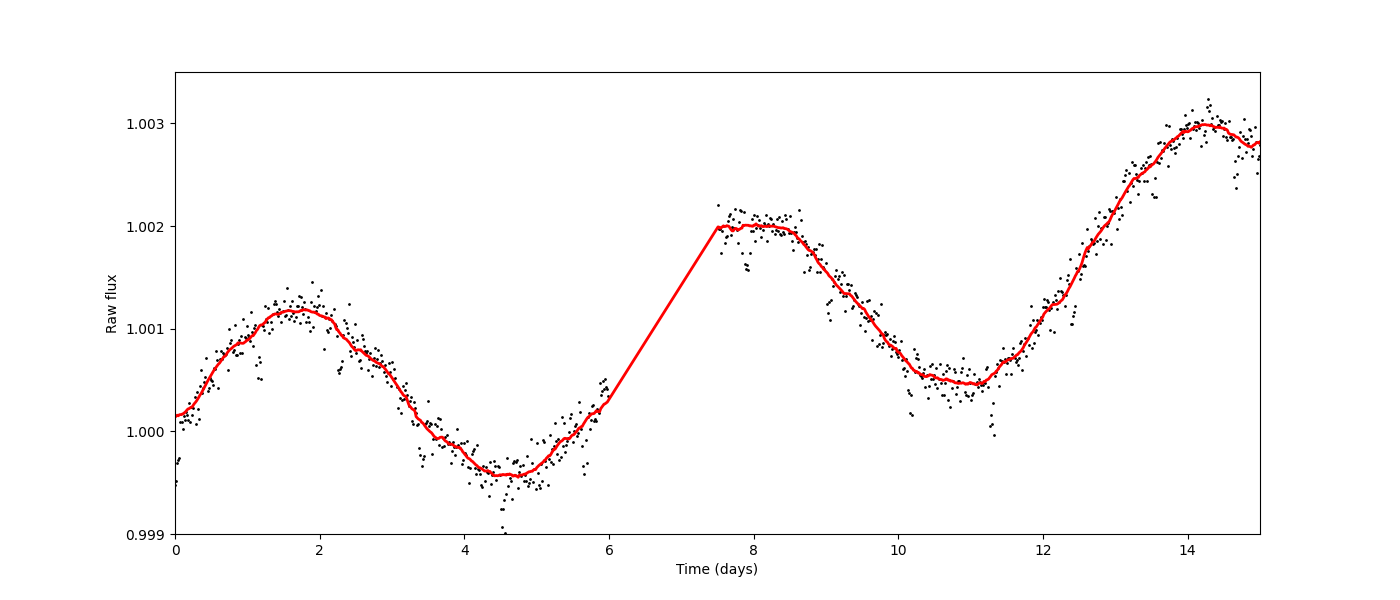

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.scatter(time, flux, s=1, color='black')
ax.plot(time, trend_lc, linewidth=2, color='red')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Raw flux')
ax.set_xlim(0, 15)
ax.set_ylim(0.999, 1.0035)
plt.show()

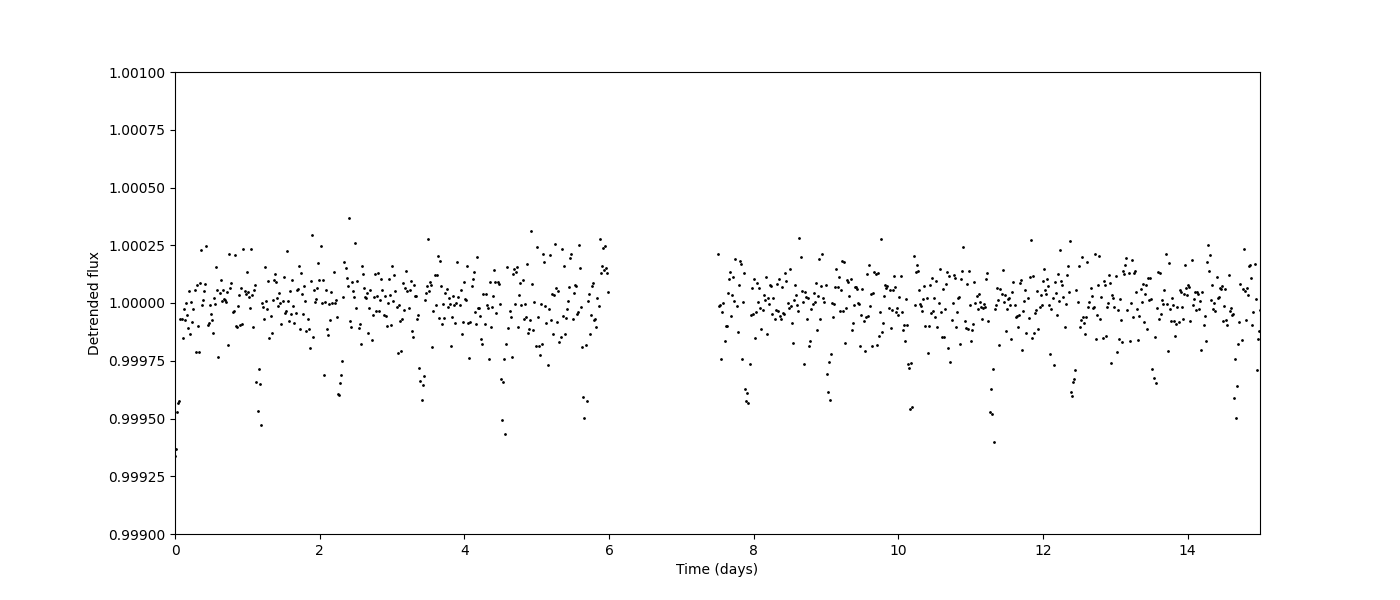

In [4]:
fig1, ax1 = plt.subplots(1, 1, figsize=(14, 6))
ax1.scatter(time, flatten_lc, s=1, color='black')
ax1.set_xlim(0, 15)
ax1.set_ylim(0.999, 1.001)
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Detrended flux')
plt.show();